Experiment with Tensorflow to build the same predictor

1. Rebuild the same model as the PyTorch one and see if they perform any different
2. Try more layers, different parameters, etc to learn a bit more
3. Stick in a GridSearchCV pipeline to see how it does with getting a better version
4. Save out the models as before to use in an application

Initial code setup comes from the [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
#  tf.config.experimental.list_physical_devices('GPU')

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

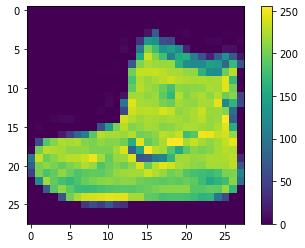

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


Preprocess the data - in this case it's scaling each of the pixel values from 0-1

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

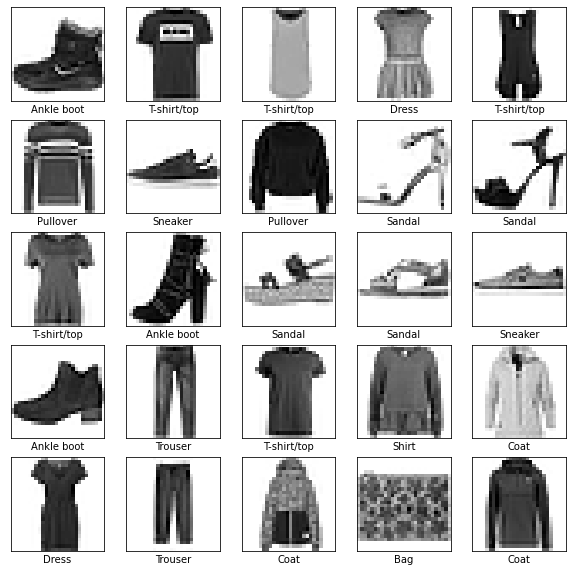

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


The example model is below - I'll be expanding on it later in the notebook (turning it into a CNN, experimenting with different layers)

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5004 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3801 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3378 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3152 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2954 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2796 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2506 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# for overfitting try a little L@ regularization

313/313 - 0s - loss: 0.3483 - accuracy: 0.8783

Test accuracy: 0.8783000111579895


In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


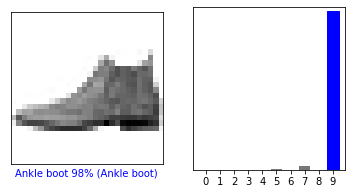

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


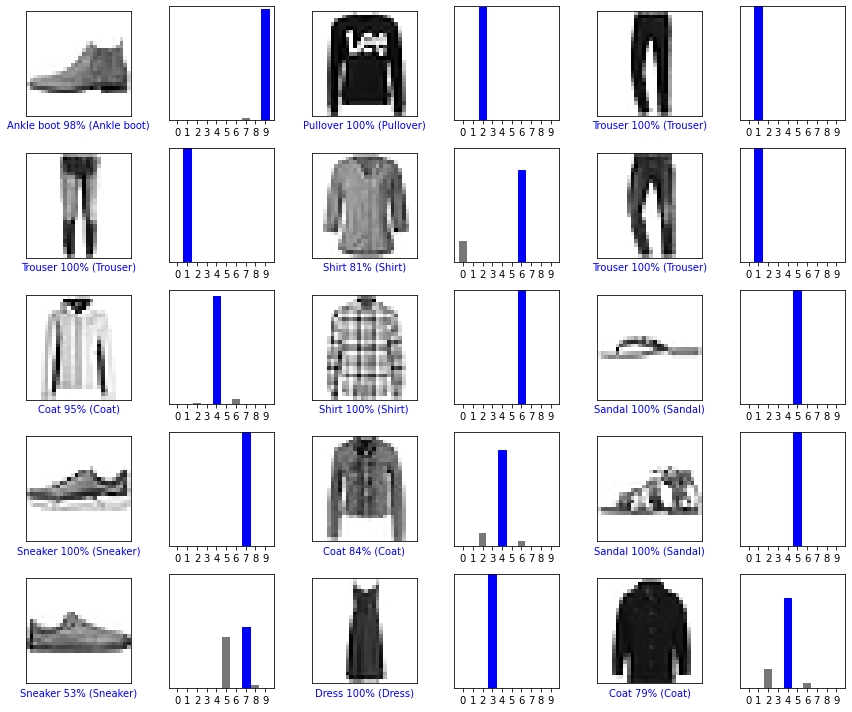

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


(28, 28)
(1, 28, 28)
[[1.8095332e-05 2.9574057e-14 9.9903870e-01 2.5204745e-12 7.2749215e-04
  2.5693286e-12 2.1565182e-04 7.1455678e-13 1.3628046e-08 6.7516612e-17]]


2

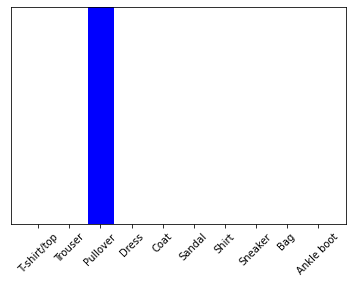

In [16]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])


In [17]:
train_images[0].shape

(28, 28)

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [21]:
# Mimic the format of the structure of the PyTorch model
batch_size = 100

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', input_shape=(28, 28,1), data_format='channels_last'))
model.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(keras.layers.Conv2D(filters=12, kernel_size=5, activation='relu'))# input_shape=(6,12, 12)))
model.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))#, input_shape=(12*4*4,)))
model.add(keras.layers.Dense(60, activation='relu'))
model.add(keras.layers.Dense(10))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 12)          1812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               23160     
_________________________________________________________________
dense_3 (Dense)              (None, 60)               

In [22]:
train_images[0].shape

(28, 28, 1)

In [25]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

history = model.fit(train_images,
         train_labels,
         batch_size=500,
         epochs=100,
         shuffle=True,
         validation_data=(test_images, test_labels))
# It's overfit, but I'll include overfitting on the below one

Epoch 1/100
120/120 [==============================] - 10s 81ms/step - loss: 0.2574 - accuracy: 0.9055 - val_loss: 0.3163 - val_accuracy: 0.8871
Epoch 2/100
120/120 [==============================] - 9s 79ms/step - loss: 0.2490 - accuracy: 0.9084 - val_loss: 0.3064 - val_accuracy: 0.8908
Epoch 3/100
120/120 [==============================] - 10s 81ms/step - loss: 0.2428 - accuracy: 0.9104 - val_loss: 0.3079 - val_accuracy: 0.8899
Epoch 4/100
120/120 [==============================] - 9s 78ms/step - loss: 0.2392 - accuracy: 0.9121 - val_loss: 0.3125 - val_accuracy: 0.8862
Epoch 5/100
120/120 [==============================] - 10s 80ms/step - loss: 0.2329 - accuracy: 0.9143 - val_loss: 0.3051 - val_accuracy: 0.8895
Epoch 6/100
120/120 [==============================] - 9s 79ms/step - loss: 0.2285 - accuracy: 0.9156 - val_loss: 0.3056 - val_accuracy: 0.8900
Epoch 7/100
120/120 [==============================] - 10s 85ms/step - loss: 0.2249 - accuracy: 0.9170 - val_loss: 0.3036 - val_accur

120/120 [==============================] - 9s 79ms/step - loss: 0.1052 - accuracy: 0.9618 - val_loss: 0.4098 - val_accuracy: 0.8936
Epoch 58/100
120/120 [==============================] - 9s 77ms/step - loss: 0.1028 - accuracy: 0.9622 - val_loss: 0.4103 - val_accuracy: 0.8941
Epoch 59/100
120/120 [==============================] - 9s 78ms/step - loss: 0.1020 - accuracy: 0.9627 - val_loss: 0.4125 - val_accuracy: 0.8920
Epoch 60/100
120/120 [==============================] - 9s 78ms/step - loss: 0.1031 - accuracy: 0.9627 - val_loss: 0.4309 - val_accuracy: 0.8908
Epoch 61/100
120/120 [==============================] - 9s 77ms/step - loss: 0.0993 - accuracy: 0.9633 - val_loss: 0.4250 - val_accuracy: 0.8949
Epoch 62/100
120/120 [==============================] - 9s 79ms/step - loss: 0.1015 - accuracy: 0.9619 - val_loss: 0.4271 - val_accuracy: 0.8971
Epoch 63/100
120/120 [==============================] - 9s 77ms/step - loss: 0.0964 - accuracy: 0.9647 - val_loss: 0.4227 - val_accuracy: 0.892

In [27]:
model.save('saved_models/tf-mimic-3.h5') 

### Now that the testing is done, lets recreate the model in a way we can use it with scikit-learn and GridSearchCV 

In [29]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [36]:
#Wrapper function for the Keras CNN that will allow easier experimentation with GridSearchCV
def build_classifier(kernel_size=5, # kernel size of the Conv layers
                     max_pool_size=2, #Size of the MaxPool layers
                     pool_strides=2, # Stride of the MaxPool layers
                     filters=(6,12), #Filter size
                     dense_size=(120,60), #Size of the dense layers
                     learning_rate=0.001, # Learnig rate for Adam
                     dropout_d=0.0 # dropout rate in the dense layers
                    ): 
    
    # Starting model
    model = keras.models.Sequential()
    
    # Convolutional / pooling layers
    model.add(keras.layers.Conv2D(filters=filters[0], kernel_size=kernel_size, activation='relu', input_shape=(28, 28,1), data_format='channels_last'))
    model.add(keras.layers.MaxPooling2D(pool_size=max_pool_size, strides=pool_strides))
    model.add(keras.layers.Conv2D(filters=[1], kernel_size=kernel_size, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=max_pool_size, strides=pool_strides))

    # Dense layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(dropout_d))
    model.add(keras.layers.Dense(dense_size[0], activation='relu'))
    model.add(keras.layers.Dropout(dropout_d))
    model.add(keras.layers.Dense(dense_size[1], activation='relu'))
    model.add(keras.layers.Dropout(dropout_d))
    
    # Output layer
    model.add(keras.layers.Dense(10))
    
    # Compile the model
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
             metrics=[tf.keras.metrics.CategoricalCrossentropy(from_logits=True), tf.keras.metrics.Accuracy()]
                 )

In [37]:
earlystop_callack = keras.callbacks.EarlyStopping(
  monitor='val_loss',
  min_delta=0.0001,
  patience=3,
  restore_best_weights=True)

In [39]:
param_grid = {
    "kernel_size": [3,5],
    "max_pool_size": [2,3],
    "pool_strides": [1,2],
    "filters": [(6,12),(4,8)],
    "dense_size": [(120,60), (100,50)],
    "learning_rate": [0.005,0.001, 0.0005],
    "dropout_d": [0.0, 0.2],
    "batch_size": [100, 250, 500],
    "epochs": [50, 100]
}

In [40]:
# Call this with the default args, and those that should be overwritten with the param_grid will be (I think)
grid_model = KerasClassifier(
    build_fn=build_classifier,
    
    # The param_grid args to the build function
    kernel_size=5, # kernel size of the Conv layers
    max_pool_size=2, #Size of the MaxPool layers
    pool_strides=2, # Stride of the MaxPool layers
    filters=(6,12), #Filter size
    dense_size=(120,60), #Size of the dense layers
    learning_rate=0.001, # Learnig rate for Adam
    dropout_d=0.0, # dropout rate in the dense layers
    
    # The param_grid args to the fit function
    epochs = 50, # This should really be kept under control by the early stopping
    batch_size=100,
    
    # Other single args to the fit function
    shuffle=True, # Shuffle the traiing data
    callbacks=[earlystop_callback], # Utilize early stopping as defined above
    validation_data=(test_images, test_labels)) # Use test data as validation data

Below is old code I'll leverage later to build the neural net in a way that's compatible with sklearn and gridsearchcv

In [ ]:
"# Number of neurons could be varying numbers: anything from 1/2 input + output to anything between\n",
"num_input_dim = df.shape[1] - 1 # columns in df, minus target\n",
"def build_classifier(num_neurons, optimizer, initializer, activator, loss_func, num_additional_layers, dropout, feature_dropout, dropout_before):\n",
"    classifier = Sequential()\n",
"    \n",
"    # First layer\n",
"    classifier.add(Dense(units = num_neurons, kernel_initializer = initializer, activation = activator, input_dim = num_input_dim))\n",
"    # Dropout\n",
"    classifier.add(Dropout(rate = feature_dropout))\n",
"    # Second layer\n",
"    classifier.add(Dense(units = num_neurons, kernel_initializer = initializer, activation = activator))\n",
"    if dropout_before:\n",
"        classifier.add(Dropout(rate = dropout))\n",
"    # Add arbitrary additional layers (not implemented yet)\n",
"    for i in range(num_additional_layers): #add a previous layer + dropout layer for each of the additional layers\n",
"        classifier.add(Dense(units = num_neurons, kernel_initializer = initializer, activation = activator))\n",
"        classifier.add(Dropout(rate = dropout))\n",
"    \n",
"    # Final output layer\n",
"    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))\n",
"    \n",
"    classifier.compile(optimizer = optimizer, loss = loss_func, metrics = ['accuracy','binary_accuracy', tf.keras.metrics.AUC()])\n",
"    return classifier"

In [ ]:
"classifier = KerasClassifier(build_fn = build_classifier)\n",
    "\n",
    "parameters = {'clf__activator': ['relu'],\n",
    "             'clf__batch_size': [10],\n",
    "             'clf__dropout': [0.5],\n",
    "             'clf__epochs': [250],\n",
    "             'clf__feature_dropout': [0.2],\n",
    "             'clf__initializer': ['uniform'],\n",
    "             'clf__loss_func': ['binary_crossentropy'],\n",
    "             'clf__num_additional_layers': [0],\n",
    "             'clf__num_neurons': [216],\n",
    "             'clf__optimizer': ['adam'],\n",
    "             'clf__dropout_before': [False]}\n",
    "\n",

In [ ]:
"pipeline = Pipeline(steps=[\n",
    "    ('preprocessor', preprocessor),\n",
    "    ('clf', classifier)\n",
    "])"

In [ ]:
"grid_search = GridSearchCV(estimator = pipeline,\n",
    "                           param_grid = parameters, #test_parameters\n",
    "                           scoring = 'roc_auc',\n",
    "                           cv = 3,\n",
    "                          n_jobs=-1,\n",
    "                          verbose=5)\n",
    "grid_search = grid_search.fit(X_train, y_train)\n"